In [1]:
%pylab notebook
from IPython.display import Latex

Populating the interactive namespace from numpy and matplotlib


Le triangle ABC, dangereux pour la navigation, a pour aire 756 km2 et pour côtés des nombres entiers de km (AB mesure 42 km). Pour chaque point D où un navire a sombré, une association a tracé une carte où les parallèles aux côtés de ABC passant par D délimitent trois « triangles de recueillement ».

* Pour le naufrage du Père Dition, le périmètre de chacun de ces triangles est égal à la longueur du côté de ABC avec lequel il possède un côté commun.

* Pour le naufrage de la Cool Douce, la somme des aires des triangles de recueillement est la plus petite possible.

Questions:

* 1A. Quelle est, en mètres, la distance du point de naufrage du Père Dition au côté AB ? 

* 2A. Quelle est, en mètres, la distance entre les deux lieux de sinistre ?

Source: problème [no 1012](http://www.affairedelogique.com/espace_probleme.php?corps=probleme&num=1012)

## Determination of the measures of triangle $(ABC)$

Let $H$ be the orthogonal projection of $C$ on $(AB)$. Hence, the surface $\sigma$ of triangle $(ABC)$ is $\sigma=\frac{1}{2}AB\;CH$ hence $CH=\frac{2\sigma}{AB}$. By symmetry, we can assume that $AH\leq\frac{1}{2}AB$ and, since $AC^2=AH^2+CH^2$, we have
\begin{equation*}
CH\leq AC\leq\sqrt{CH^2+(\frac{1}{2}AB)^2}
\end{equation*}
Now, we have $BC^2=AC^2+AB^2-2AB\;AH$, hence
\begin{equation*}
2AB\sqrt{AC^2-CH^2} = AC^2+AB^2-BC^2
\end{equation*}
By hypothesis, the right-hand side is integral, so we need to find the (integral) AC between $CH$ and $\sqrt{CH^2+(\frac{1}{2}AB)^2}$ such that $2AB\sqrt{AC^2-CH^2}$ is non null integral. $AC$ can thus be determined by enumeration.

In [34]:
σ = 756.
AB = 42.
CH = 2*σ/AB
r = arange(ceil(CH), sqrt((AB/2)**2+CH**2))
t = 2*AB*sqrt(r**2-CH**2)
AC, = r[(abs(t-rint(t))<1.e-6) & (t>0)]
AH = sqrt(AC**2-CH**2)
BH = AB-AH
BC = sqrt(BH**2+CH**2)
res = ('{}&=&{}'.format(k,v) for k,v in (('AB',AB),('AC',AC),('BC',BC),('AH',AH),('BH',BH),('CH',CH)))
Latex(r'$\begin{{array}}{{rcl}} {} \end{{array}}$'.format(r' \\ '.join(res)))

<IPython.core.display.Latex object>

In [38]:
def illustration1(fig):
    def c(*L,close=True):
        if close: L += (L[0],)
        return [x for x,y in L],[y for x,y in L]
    A,B,C,H = array(((0.,0.),(AB,0.),(AH,CH),(AH,0.)))
    u,v,w = 1./7.,2./7.,4./7.
    D,Bʹ,Cʹ = array(((v*AB+w*AH,w*CH),((1.-w)*AB+w*AH,w*CH),(v*AB+(1.-v)*AH,(1.-v)*CH)))
    ax = fig.add_subplot(1,1,1,aspect='equal',frameon=False,xticks=(),yticks=())
    ax.plot(*c(A,B,C),c='b',zorder=1)
    ax.plot(*c(C,H),c='k',ls='--')
    for s,xy,d in ('A',A,(-4.,-4.)),('B',B,(4.,-4.)),('C',C,(0.,4.)),('H',H,(0.,-4.)),('D',D,(0.,0.)),('B\'',Bʹ,(4.,4.)),('C\'',Cʹ,(4.,4.)):
        ax.annotate(s,xy,xytext=d,textcoords='offset points',ha='center',va='center')
    ax.fill(*c(u*A+(1.-u)*B,u*A+(1.-u)*C,w*C+(1.-w)*A,w*C+(1.-w)*B,v*B+(1.-v)*C,v*B+(1.-v)*A),zorder=0,c='lightgreen')

<IPython.core.display.Javascript object>


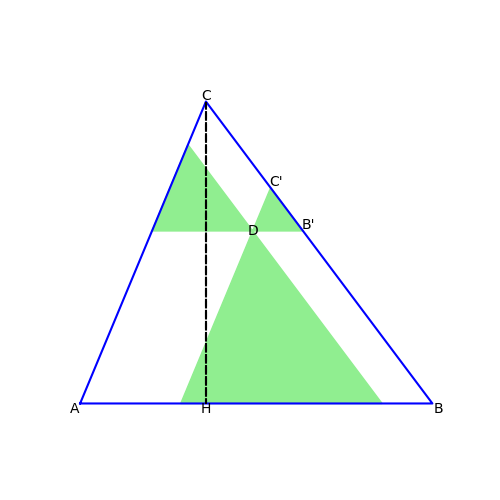

In [39]:
fig = figure(figsize=(5,5))
illustration1(fig)

## Solution

A point $D$ within triangle $(ABC)$ can be represented by its barycentric coordinates $u,v,w\geq0$ such that $u+v+w=1$. Let $B',C'$ be the intersections of $(BC)$ with the lines parallel to $(AB)$ and $(AC)$ respectively, going through $D$. We have
\begin{eqnarray*}
D & = & uA+vB+wC\\
B' & = & (1-w)B+wC\\
C' & = & vB+(1-v)C
\end{eqnarray*}
Observe that
\begin{equation*}
\vec{DB'} = u\vec{AB} \hspace{2cm} \vec{DC'} = u\vec{AC} \hspace{2cm} \vec{BB'}=w\vec{BC} \hspace{2cm} \vec{CC'}=v\vec{CB}
\end{equation*}

* In the case of "Père Dition", we have by hypothesis $DB'+DC'+B'C'= BC$, hence $DB'+DC'=BB'+CC'$. Hence, $u(AB+AC)=(v+w)BC=(1-u)BC$ hence $u=\frac{1}{\rho}BC$ where $\rho\triangleq AB+BC+CA$ is the perimeter of triangle $(ABC)$. By symmetry, we get
  \begin{equation*}
  u=\frac{1}{\rho}BC \hspace{2cm} v=\frac{1}{\rho}AC \hspace{2cm} w=\frac{1}{\rho}AB
  \end{equation*}
  Let $R_1$ be the distance from $D$ to $(AB)$. We have
  \begin{equation*}
  R_1 = \frac{|\vec{AD}\wedge\vec{AB}|}{AB} = \frac{|(v\vec{AB}+w\vec{AC})\wedge\vec{AB}|}{AB} = w\frac{|\vec{AC}\wedge\vec{AB}|}{AB} = \frac{1}{\rho}|\vec{AC}\wedge\vec{AB}|=\frac{2\sigma}{\rho}
  \end{equation*}

* In the case of "Cool Douce", observe that the surface of triangle $(DB'C')$ is given by $\frac{1}{2}|\vec{DB'}\wedge\vec{DC'}|=u^2\sigma$, hence the total surface of the triangles is $\sigma(u^2+v^2+w^2)$. By symmetry, it is minimal when $u=v=w=\frac{1}{3}$. The distance $R_2$ to "Père Dition" is given by
  \begin{equation*}
  R_2 = \sqrt{(\frac{AC}{\rho}-\frac{1}{3})^2AB^2+(\frac{AB}{\rho}-\frac{1}{3})^2AC^2+2(\frac{AB}{\rho}-\frac{1}{3})(\frac{AC}{\rho}-\frac{1}{3})AB\;AH}
  \end{equation*}

In [167]:
ρ = AB+AC+BC
rep_1 = 2*σ/ρ
rep_2 = sqrt(((AC/ρ-1/3)*AB)**2+((AB/ρ-1/3)*AC)**2+2*(AC/ρ-1/3)*(AB/ρ-1/3)*AB*AH)
rep_1,rep_2

(12.0, 0.99999999999999878)

In [168]:
AB/ρ-1/3,(AC/ρ-1/3)*AB

(0.0, -0.99999999999999878)